In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [5]:
plt.rcParams['axes.unicode_minus'] = False

In [6]:
t = pd.read_csv('泰坦尼克号_老师.csv',
                index_col = 0)
t.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


In [7]:
t.dtypes

budget                    int64
genres                   object
id                        int64
keywords                 object
original_language        object
popularity              float64
production_companies     object
production_countries     object
date                     object
revenue                   int64
runtime                 float64
title                    object
vote_average            float64
vote_count                int64
actor                    object
director                 object
dtype: object

In [8]:
t['date'] = pd.to_datetime(t['date'],
               format = "%Y-%m-%d")

In [9]:
t.dtypes

budget                           int64
genres                          object
id                               int64
keywords                        object
original_language               object
popularity                     float64
production_companies            object
production_countries            object
date                    datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
actor                           object
director                        object
dtype: object

### 接昨天的数据处理

#### 查看数据分布

In [10]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [11]:
digit_var = t.columns[t.dtypes != 'object'][[0,4,6,7]]

In [12]:
digit_var

Index(['budget', 'revenue', 'vote_average', 'vote_count'], dtype='object')

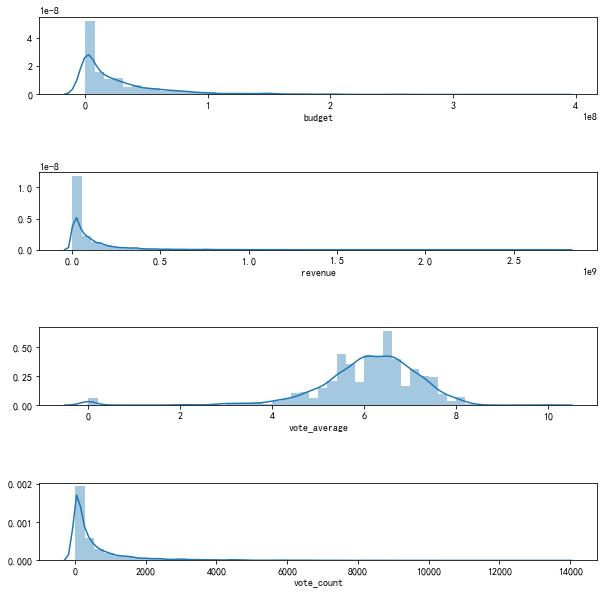

In [13]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace = 1,wspace = 1)
for i in range(len(digit_var)):
    ax = fig.add_subplot(4,1,i + 1)# i是从0开始
    sns.distplot(t[digit_var[i]],bins = 50,ax = ax)
#distplot 核密度和柱形图 
#kde;   Kernel Density Estimation;核密度估计


# 探索性数据分析
#EDA;Explore Data;Exploratory data analysis

# 评分人数相似正太分布,其他三个图表相似幂律分布

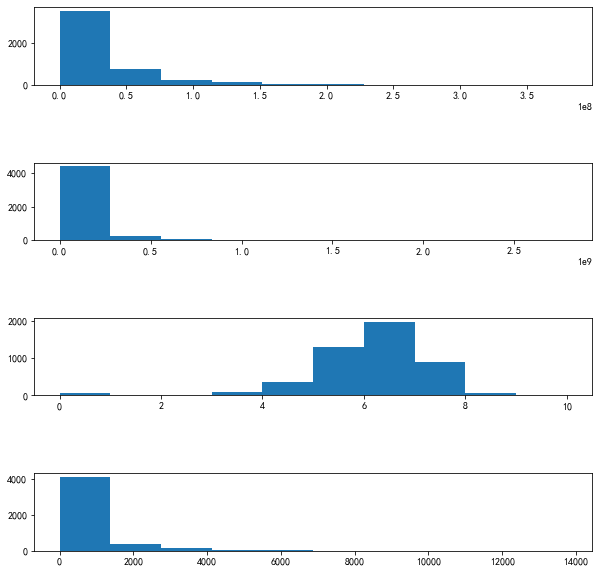

In [14]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace = 1,wspace = 1)
for i in range(len(digit_var)):
    ax = fig.add_subplot(4,1,i + 1)# i是从0开始
    plt.hist(t[digit_var[i]])

In [15]:
# plt.plot(t['budget'])
# plt.xlabel('budget')
# plt.show()

In [16]:
# # a = t['budget']/(t['budget'].max()-t['budget'].min())
# # x = np.array(a)
# # x
# x = t['budget']
# x

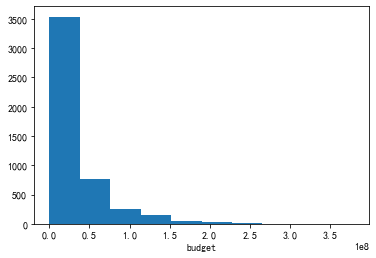

In [17]:
# plt.plot(x)
plt.hist(t['budget'])
plt.xlabel('budget')
# plt.xlim([0,4])
# plt.ylim([0,4])
plt.show()

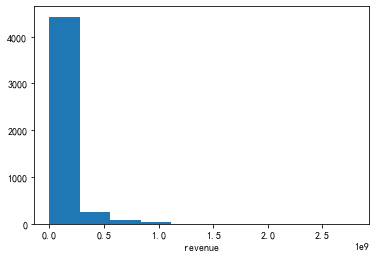

In [18]:
plt.hist(t['revenue'])
plt.xlabel('revenue')
plt.show()

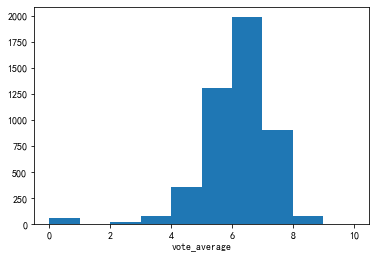

In [19]:
plt.hist(t['vote_average'])
plt.xlabel('vote_average')
plt.show()

只有电影评分近似正太分布

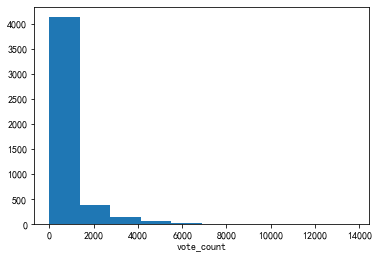

In [20]:
plt.hist(t['vote_count'])
plt.xlabel('vote_count')
plt.show()

In [21]:
# 画出如下图



- 我们看到各列数据都有为0的值
- 电影评分近似正态分布,其他3列数据都存在严重的长尾

#### 统计每年有多少电影

In [22]:
# sns.set_style("whitegrid")


- 电影上映年份的跨度很大，如果考虑很大的时间跨度，会引入诸多影响因子（例如通货膨胀对票房金额的影响），不利于发现规律，因此有必要筛选以缩小研究范围,我们选取95年之后的数据作为研究对象。

- 评分人数（vote_count）过低的电影，其评分（vote_average）也不具有统计意义，这里筛选评分人数大于0.25分位数的数据。其他票房、预算等为0的数据也应该筛去

#### 按上述要求筛选数据

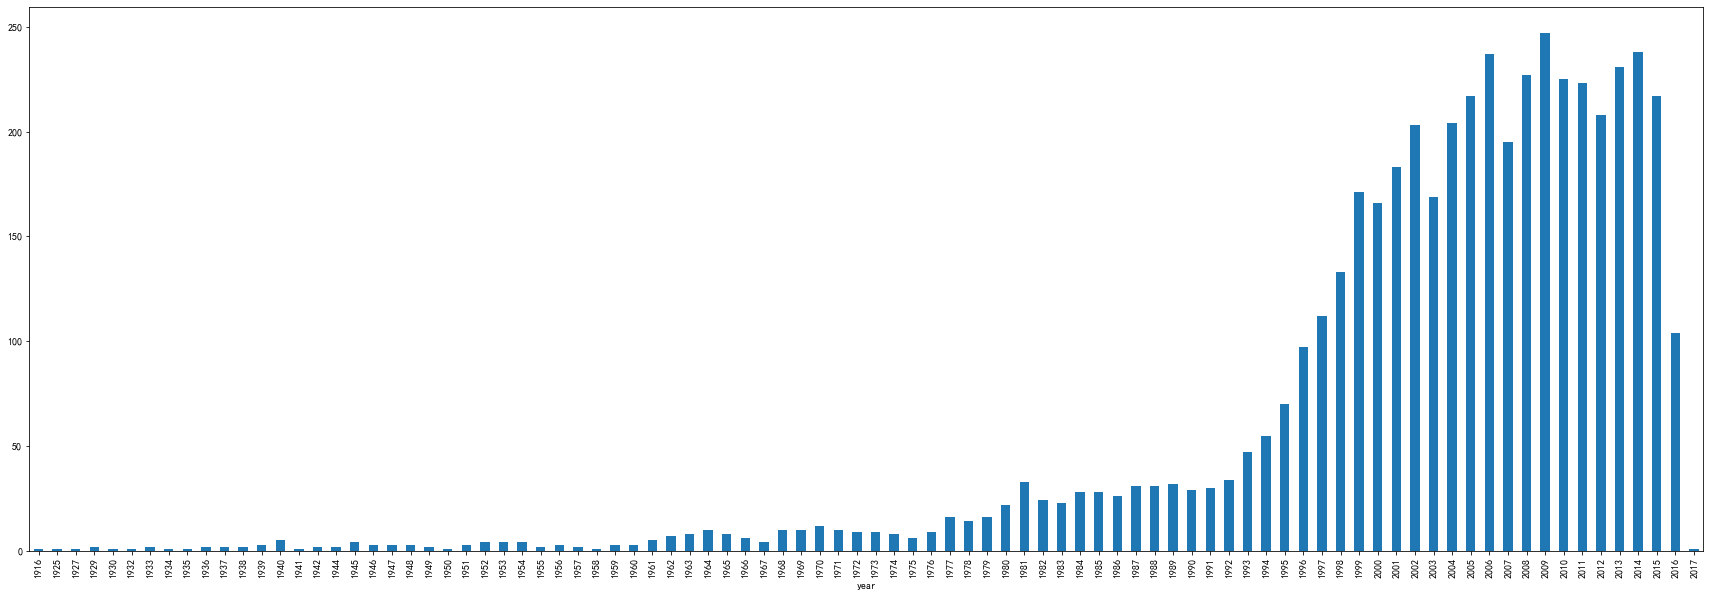

In [24]:
plt.figure(figsize = (30,10)) # 第一种:figsize 调整画布大小
# fig,ax = plt.subplots(1,1,figsize =(25,10))
# 第二种figsize 调整画布(子图)大小
t['year'] = t['date'].dt.year
t.groupby('year')['year'].count().plot(kind = 'bar')
plt.show()

# 95年到17年电影的时常普遍变长了,说明电影事业越来越好了

In [25]:
help(t.groupby('year')['year'].count().plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

In [26]:
year_y = t.groupby(by = ['year'])[['year']].count()
year_y

,year
year,
1916,1
1925,1
1927,1
1929,2
1930,1
...,...
2013,231
2014,238
2015,217


In [27]:
year_x = year_y.index
year_x # bar行

Int64Index([1916, 1925, 1927, 1929, 1930, 1932, 1933, 1934, 1935, 1936, 1937,
            1938, 1939, 1940, 1941, 1942, 1944, 1945, 1946, 1947, 1948, 1949,
            1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='year')

In [28]:
year_y = year_y.values
year_y # bar列

array([[  1],
       [  1],
       [  1],
       [  2],
       [  1],
       [  1],
       [  2],
       [  1],
       [  1],
       [  2],
       [  2],
       [  2],
       [  3],
       [  5],
       [  1],
       [  2],
       [  2],
       [  4],
       [  3],
       [  3],
       [  3],
       [  2],
       [  1],
       [  3],
       [  4],
       [  4],
       [  4],
       [  2],
       [  3],
       [  2],
       [  1],
       [  3],
       [  3],
       [  5],
       [  7],
       [  8],
       [ 10],
       [  8],
       [  6],
       [  4],
       [ 10],
       [ 10],
       [ 12],
       [ 10],
       [  9],
       [  9],
       [  8],
       [  6],
       [  9],
       [ 16],
       [ 14],
       [ 16],
       [ 22],
       [ 33],
       [ 24],
       [ 23],
       [ 28],
       [ 28],
       [ 26],
       [ 31],
       [ 31],
       [ 32],
       [ 29],
       [ 30],
       [ 34],
       [ 47],
       [ 55],
       [ 70],
       [ 97],
       [112],
       [133],
      

In [29]:
# fig,ax = plt.subplots(1,1,figsize = (30,10))
# # year = t.groupby(by = ['year'])['year'].count()
# plt.bar(year_y,year_x)

In [30]:
# t['year'] = t['date'].dt.year
# t.groupby('year')['year'].count().plot(kind = 'bar')
# plt.show()

In [31]:
# data = t['vote_average']
# data = list(data)[:len(year)]
# data

In [32]:
# a = list(t['year'])
# for i in a:
#     i = str(i)

In [33]:
t = t[(t.year >= 1995) & (t.year < 2016) & (t.vote_count > 54) & \
 (t.budget * t.revenue * t.popularity * t.vote_average != 0).reset_index(drop = 'True')]

In [34]:
t.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director,year
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron,2009
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski,2007
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes,2015
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan,2012
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton,2012


In [35]:
t.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director,year
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron,2009
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski,2007
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes,2015
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan,2012
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton,2012


In [36]:
t.shape

(2392, 17)

In [38]:
# data.shape

### 票房分析

#### 什么样的电影更容易成功？

In [39]:
# 票房收入
t.sort_values('revenue',ascending = False) \
[['title','revenue','budget','genres']][:10]

,title,revenue,budget,genres
0,Avatar,2787965087,237000000,Action|Adventure|Fantasy|Science Fiction
25,Titanic,1845034188,200000000,Drama|Romance|Thriller
16,The Avengers,1519557910,220000000,Science Fiction|Action|Adventure
28,Jurassic World,1513528810,150000000,Action|Adventure|Science Fiction|Thriller
44,Furious 7,1506249360,190000000,Action
7,Avengers: Age of Ultron,1405403694,280000000,Action|Adventure|Science Fiction
124,Frozen,1274219009,150000000,Animation|Adventure|Family
31,Iron Man 3,1215439994,200000000,Action|Adventure|Science Fiction
546,Minions,1156730962,74000000,Family|Animation|Adventure|Comedy
52,Transformers: Dark of the Moon,1123746996,195000000,Action|Science Fiction|Adventure


In [40]:
# 评分
t.sort_values('vote_average',ascending = False) \
[['title','vote_average','budget','genres']][:10]

,title,vote_average,budget,genres
662,Fight Club,8.3,63000000,Drama
3865,Whiplash,8.3,3300000,Drama
2294,Spirited Away,8.3,15000000,Fantasy|Adventure|Animation|Family
690,The Green Mile,8.2,60000000,Fantasy|Drama|Crime
2247,Princess Mononoke,8.2,26500000,Adventure|Fantasy|Animation
1987,Howl's Moving Castle,8.2,24000000,Fantasy|Animation|Adventure
65,The Dark Knight,8.2,185000000,Drama|Action|Crime|Thriller
3057,American History X,8.2,20000000,Drama
3866,City of God,8.1,3300000,Drama|Crime
2760,Room,8.1,6000000,Drama|Thriller


In [41]:
# 流行
t.sort_values('popularity',ascending = False) \
[['title','popularity','budget','genres']][:10]

,title,popularity,budget,genres
546,Minions,875.581305,74000000,Family|Animation|Adventure|Comedy
95,Interstellar,724.247784,165000000,Adventure|Drama|Science Fiction
94,Guardians of the Galaxy,481.098624,170000000,Action|Science Fiction|Adventure
127,Mad Max: Fury Road,434.278564,150000000,Action|Adventure|Science Fiction|Thriller
28,Jurassic World,418.708552,150000000,Action|Adventure|Science Fiction|Thriller
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,140000000,Adventure|Fantasy|Action
82,Dawn of the Planet of the Apes,243.791743,170000000,Science Fiction|Action|Drama|Thriller
200,The Hunger Games: Mockingjay - Part 1,206.227151,125000000,Science Fiction|Adventure|Thriller
88,Big Hero 6,203.734590,165000000,Adventure|Family|Animation|Action|Comedy
108,Terminator Genisys,202.042635,155000000,Science Fiction|Action|Thriller|Adventure


In [42]:
# 票房的top10


- 这10部影片预算是亿级（美元）的，票房是十亿级的，属于高投入高收入的影片。
- 有8部是动作/科幻片/冒险，2部动画片，显然电影类型对票房是有影响的

#### 预算和票房的变化趋势

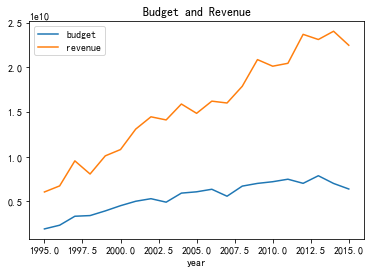

In [43]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'line',title = 'Budget and Revenue')

# 电影的投资越大,得到的收益越大

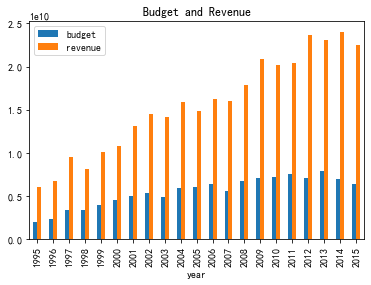

In [44]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'bar',title = 'Budget and Revenue')

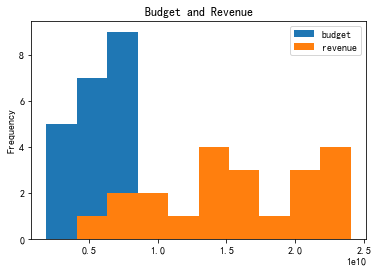

In [45]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'hist',title = 'Budget and Revenue')

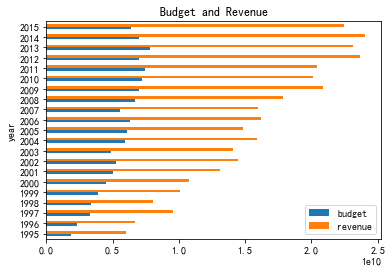

In [46]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'barh',title = 'Budget and Revenue')

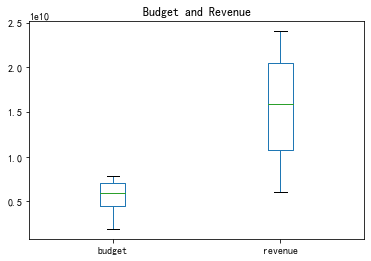

In [47]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'box',title = 'Budget and Revenue')

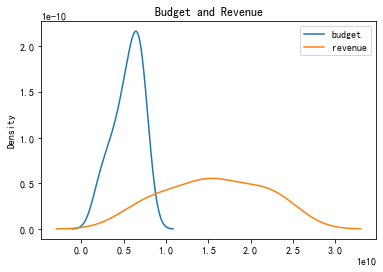

In [48]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'kde',title = 'Budget and Revenue')

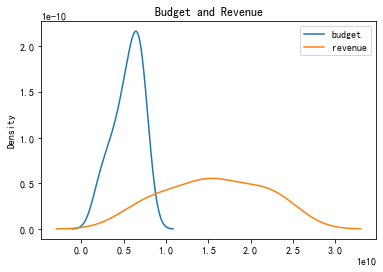

In [49]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'density',title = 'Budget and Revenue')

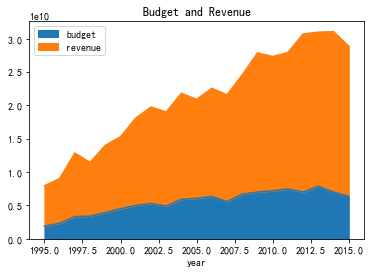

In [50]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'area',title = 'Budget and Revenue')

In [51]:
help(t.groupby('year')['budget','revenue'].sum().plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

#### 展示投入回报

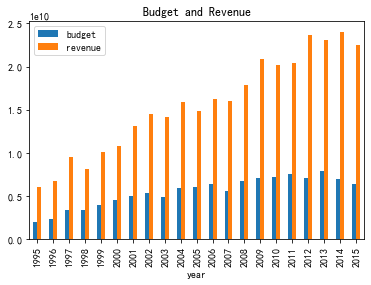

In [53]:
t.groupby('year')['budget','revenue'].sum().plot(kind = 'bar',title = 'Budget and Revenue')

# 从图上可以看出投入的相对越大,票房也相对的越高

In [54]:
# ROI 投资回报率: (收益 - 投资)/投资
# t['roi'] = (t.revenue - t.budget)/t.budget

In [55]:
# h = t.groupby('year')['revenue','budget'].sum()
# h['roi'] = (h.revenue - h.budget)/h.budget
# h

In [76]:
t.groupby('year')['revenue','budget'].sum()

,revenue,budget
year,,
1995,6041195547,1903350008
1996,6720285121,2318192051
1997,9524205888,3321916953
1998,8052103253,3397840000
1999,10085851907,3921160025
2000,10792142679,4504700030
2001,13082888626,5001150028
2002,14458535780,5287600159
2003,14108781270,4899050000


In [77]:
# tt = t.groupby('year')['revenue','budget'].sum()
# tt

In [80]:
t.groupby('year')['revenue','budget'].sum()['roi'] = (tt.revenue - tt.budget)/tt.budget
t

,revenue,budget,roi
year,,,
1995,6041195547,1903350008,2.173980
1996,6720285121,2318192051,1.898934
1997,9524205888,3321916953,1.867081
1998,8052103253,3397840000,1.369771
1999,10085851907,3921160025,1.572160
2000,10792142679,4504700030,1.395752
2001,13082888626,5001150028,1.615976
2002,14458535780,5287600159,1.734423
2003,14108781270,4899050000,1.879901


In [67]:
# tt['roi'] = (tt.revenue - tt.budget)/tt.budget
# tt

,revenue,budget,roi
year,,,
1995,6041195547,1903350008,2.173980
1996,6720285121,2318192051,1.898934
1997,9524205888,3321916953,1.867081
1998,8052103253,3397840000,1.369771
1999,10085851907,3921160025,1.572160
2000,10792142679,4504700030,1.395752
2001,13082888626,5001150028,1.615976
2002,14458535780,5287600159,1.734423
2003,14108781270,4899050000,1.879901


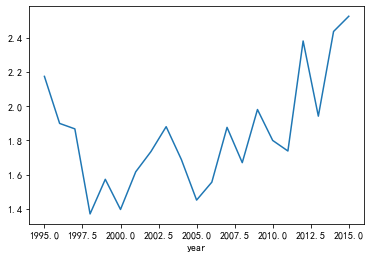

In [81]:
t['roi'].plot()

# 95年,12年,15年的投资回报率是处于最高的时候,这几年投资电影行业的都赚了

In [69]:
# h.roi.plot()

In [70]:
# # 添加ROI(投资回报率)列 （收益-投资）/投资
# br['ROI'] = 
# br

In [71]:
# 绘制投资回报率的折线图


#### 评分top10

- 可以看到票房前十和评分前十并无重合，看来票房和评分相关度太大关系

#### 评分变化趋势

In [82]:
t.columns

Index(['revenue', 'budget', 'roi'], dtype='object')

In [84]:
t = pd.read_csv('泰坦尼克号_老师.csv',
                index_col = 0)
t.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


In [86]:
t['date'] = pd.to_datetime(t['date'],
               format = "%Y-%m-%d")

In [89]:
t['year'] = t['date'].dt.year

In [91]:
t = t[(t.year >= 1995) & (t.year < 2016) & (t.vote_count > 54) & \
 (t.budget * t.revenue * t.popularity * t.vote_average != 0).reset_index(drop = 'True')]

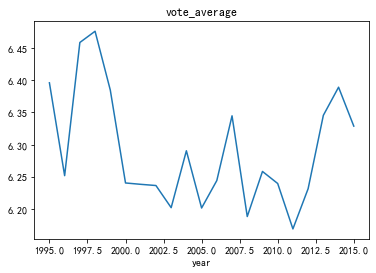

In [92]:
t.groupby('year')['vote_average'].mean().plot(kind = 'line',title = 'vote_average')

# 电影评分随年度变化趋势不明显，总体在6.25上下小幅波动,可以把坐标轴放大看看

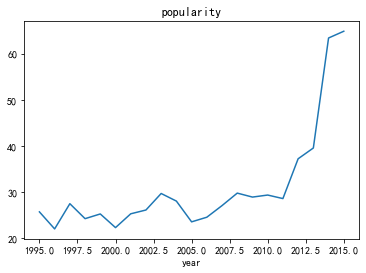

In [94]:
t.groupby('year')['popularity'].mean().plot(kind = 'line',title = 'popularity')

(1995.0, 2015.0)

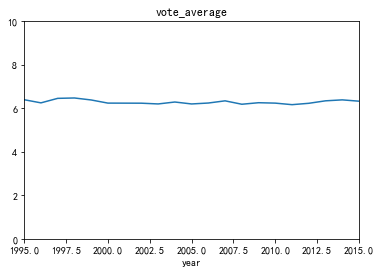

In [95]:
t.groupby('year')['vote_average'].mean().plot(kind = 'line',title = 'vote_average')
# 第一种
plt.ylim(0,10)
plt.xlim(1995,2015)

(1995.0, 2015.0, 0.0, 10.0)

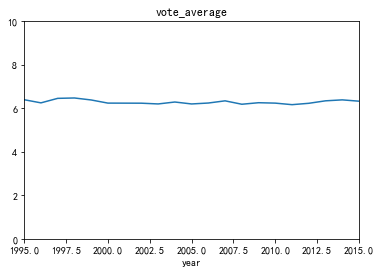

In [96]:
t.groupby('year')['vote_average'].mean().plot(kind = 'line',title = 'vote_average')
# 第二种
plt.axis([1995, 2015, 0, 10])

In [97]:
# 改变坐标轴的范围


#### 流行度排名

In [98]:
# 流行
t.sort_values('popularity',ascending = False) \
[['title','popularity','budget','genres']][:10]

,title,popularity,budget,genres
546,Minions,875.581305,74000000,Family|Animation|Adventure|Comedy
95,Interstellar,724.247784,165000000,Adventure|Drama|Science Fiction
94,Guardians of the Galaxy,481.098624,170000000,Action|Science Fiction|Adventure
127,Mad Max: Fury Road,434.278564,150000000,Action|Adventure|Science Fiction|Thriller
28,Jurassic World,418.708552,150000000,Action|Adventure|Science Fiction|Thriller
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,140000000,Adventure|Fantasy|Action
82,Dawn of the Planet of the Apes,243.791743,170000000,Science Fiction|Action|Drama|Thriller
200,The Hunger Games: Mockingjay - Part 1,206.227151,125000000,Science Fiction|Adventure|Thriller
88,Big Hero 6,203.734590,165000000,Adventure|Family|Animation|Action|Comedy
108,Terminator Genisys,202.042635,155000000,Science Fiction|Action|Thriller|Adventure


#### 各因素和票房的相关度

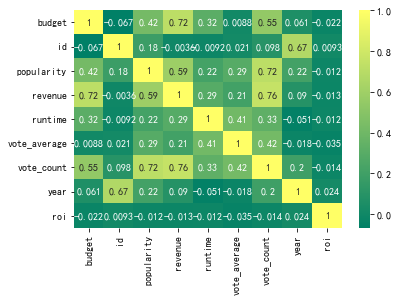

In [174]:
# heatmap 热图
# corr() p相关系数 
sns.heatmap(t.corr(),annot = True,cmap = 'summer')

# 和票房大的相关系数有投票数,流行,预算,流行度相关比较大

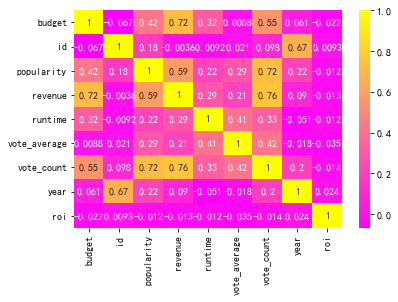

In [175]:
sns.heatmap(t.corr(),annot = True,cmap = 'spring')

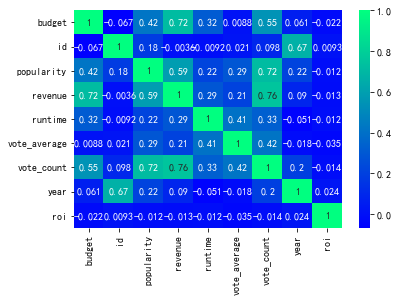

In [176]:
sns.heatmap(t.corr(),annot = True,cmap = 'winter')

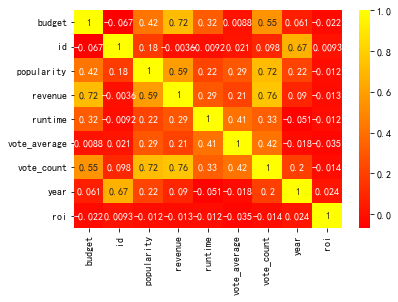

In [177]:
sns.heatmap(t.corr(),annot = True,cmap = "autumn")

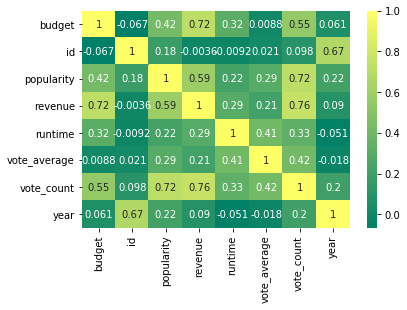

- 可以看到和票房相关度比较大的因素有投票数，预算，流行度相关度较大